<a href="https://colab.research.google.com/github/DzikriEl/FGA-DTS---Data-Science-Batch-2/blob/main/FGA%20DTS%20-%20CLASSIFICATION%20MACHINE%20LEARNING%20DATA%20COSTUMER%20CHURN%20TELEKOMUNIKASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CHALLENGE CHAPTER 2**

FRESH GRADUATE ACADEMY - DTS 2

DZIKRI FAIZZIYAN 
149368779100-303

# **DATA UNDERSTANDING**

## **Latar Belakang**

Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider.

Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.
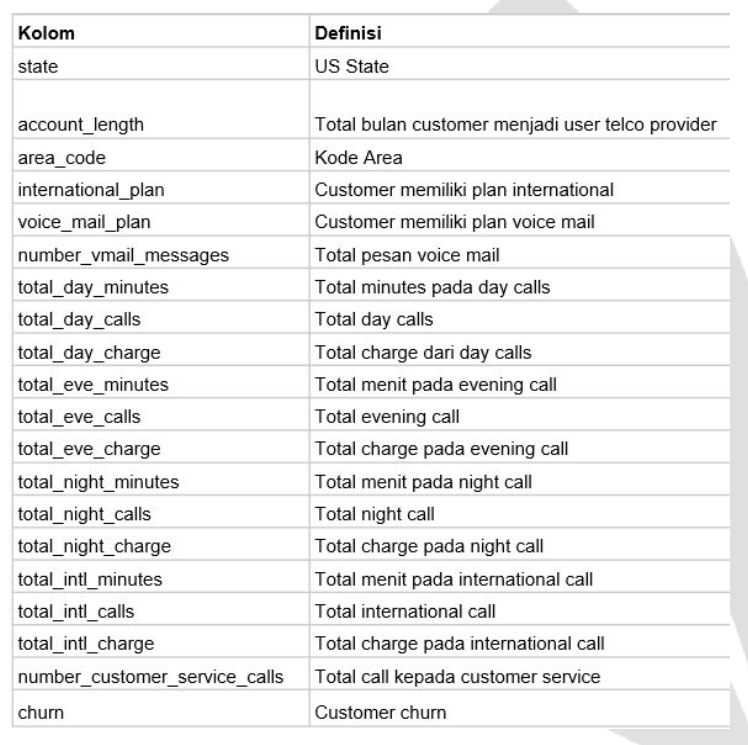


##**DATA WRANGLING**

Pertama, Import Library yang dibutuhkan dalam analisis dataset ini

In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Selanjutnya kita Upload dan Load Dataset dari storage ke Google Colaboratory

In [ ]:
#upload file
from google.colab import files
file_upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


### Membaca dataset :

In [ ]:
test = pd.read_csv(io.BytesIO(file_upload['test.csv']))
train = pd.read_csv(io.BytesIO(file_upload['train.csv']))

### Menampilkan Dataset :

In [ ]:
print(train)

     state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_

### **Menampilkan 10 data teratas dengan fungsi head()**

In [ ]:
train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


### **Menampilkan 10 data terbawah dengan fungsi head()**

In [ ]:
train.tail(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4240,AR,127,area_code_415,no,yes,27,157.6,107,26.79,280.6,49,23.85,75.1,77,3.38,8.0,4,2.16,1,no
4241,WA,80,area_code_510,no,no,0,157.0,101,26.69,208.8,127,17.75,113.3,109,5.10,16.2,2,4.37,2,no
4242,MN,150,area_code_408,no,no,0,170.0,115,28.90,162.7,138,13.83,267.2,77,12.02,8.3,2,2.24,0,no
4243,ND,140,area_code_510,no,no,0,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,7.5,6,2.03,1,yes
4244,AZ,97,area_code_510,no,no,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,yes
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


### **Menampilkan kolom pada Dataframe/Dataset dengan fungsi Keys()**

Fungsi ini digunakan untuk menampilkan kolom pada dataframe / dataset. silahkan ketikan syntax berikut

In [ ]:
train.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

### **Mengetahui jumlah kolom dan baris pada dataset dengan Fungsi Shape()**

In [ ]:
train.shape

(4250, 20)

### **Mari kita bahas**

Dari hasil output dapat kita ketahui bahwa dataset train memiliki 4250 baris dan 20 kolom.


### **Penjabaran Data dengan Fungsi Info()**

Fungsi ini untuk menampilkan gambaran data mulai dari jumlah data per kolom, tipe data per kolom, dan jumlah keseluruhan data. Fungsi ini merupakan gabungan dari pada fungsi yang telah dijelaskan sebelumnya. silahkan ketikan syntax berikut ini:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### **Menampilkan ringkasan Statistik dengan fungsi describe()**

Fungsi ini digunakan untuk menampilkan ringkasan statistik berupa mean, standar defiasi, min, max dan quartile, fungsi ini juga akan mengabaikan semua data yang berifat kategorik / non numerik. silahkan ketikan syntax berikut ini:

In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Jika ingin menampilkan seluruh data beserta data kategorik bisa kita ketikan syntax berikut:

In [ ]:
train.describe(include="all")

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


### Kita bisa memeriksa apakah dataset kita terdapat Missing Value atau tidak dengan syntak berikut :


In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

### Melihat isi kolom yang duplikat:

In [ ]:
duplicate = train[train.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
duplicate = test[test.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


# **EXPLORING DATA**

###Melihat isi/banyak data pada churn

In [ ]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

###**Visualisasi data churn dengan seaborn boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


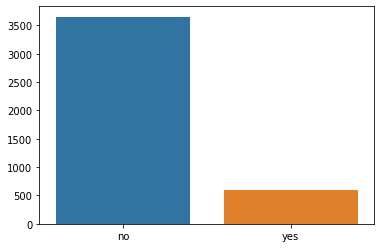

In [ ]:
y = train["churn"].value_counts()
sns.barplot(y.index, y.values)

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom

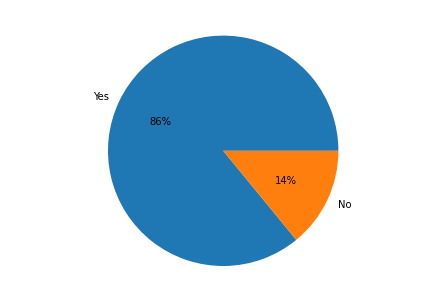

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = train.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### **Membuat Visualisasi yang berkorelasi antar variabel**

In [ ]:
df_numerical = train[['account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'international_plan', 'voice_mail_plan']]
df_numerical.corr().round(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00
number_vmail_messages,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02
total_day_minutes,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_day_calls,0.02,-0.01,0.00,1.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,0.01,-0.02
total_day_charge,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_eve_minutes,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_eve_calls,0.01,0.00,0.01,0.00,0.01,0.00,1.00,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.01,0.01
total_eve_charge,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_night_minutes,-0.01,0.02,0.01,0.00,0.01,-0.01,0.01,-0.01,1.00,0.02,1.00,-0.00,-0.02,-0.00,-0.01
total_night_calls,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01,0.01,0.02,1.00,0.02,0.00,0.00,0.00,-0.01


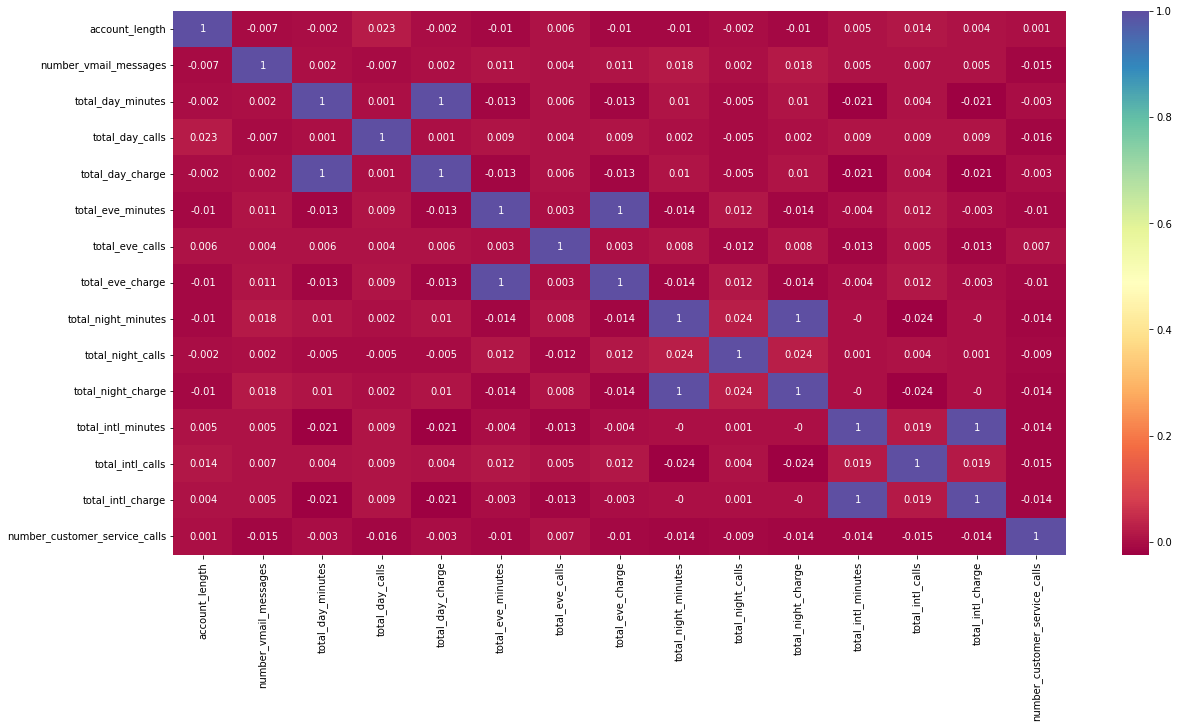

In [ ]:
cor = df_numerical.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor.round(3),annot=True,cmap='Spectral')
plt.show()

Dalam Visualisasi Heatmap ini kita bisa melihat suatu hubungan variable yang digambarkan dengan nilai rentang dari 0 sampai 1 (Berkorelasi positif / Negatif) di mana bila nilai korelasi mendekati 1 maka hubungan tersebut sangatlah kuat sebaliknya bila nilai korelasi mendekati 0 maka hubungannya sangat lemah.

# **Normalization**

Mentransform data categorical string menjadi numerical values

In [ ]:
label_encoder = preprocessing.LabelEncoder()

Mengubah tipe data string menjadi integer values

In [ ]:
train['state'] = label_encoder.fit_transform(train['state'])
train['area_code'] = label_encoder.fit_transform(train['area_code'])
train['international_plan'] = label_encoder.fit_transform(train['international_plan'])
train['voice_mail_plan'] = label_encoder.fit_transform(train['voice_mail_plan'])

Mengubah dataframe menjadi numpy array

In [ ]:
y = train['churn'].to_numpy()
y.size

4250

In [ ]:
x = train[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'number_customer_service_calls']].to_numpy()
x.size

17000

### MENGGUNAKAN MIN MAX SCALLER

In [ ]:
# Import Library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,26.094118,100.236235,0.992941,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,14.769049,39.698401,0.709978,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,73.000000,0.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,26.000000,100.000000,1.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,1.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
train['total_night_minutes'] = MinMaxScaler().fit_transform(train['total_night_minutes'].values.reshape(len(train), 1))
train['total_night_calls'] = MinMaxScaler().fit_transform(train['total_night_calls'].values.reshape(len(train), 1))
train['total_night_charge'] = MinMaxScaler().fit_transform(train['total_night_charge'].values.reshape(len(train), 1))
train['number_customer_service_calls'] = MinMaxScaler().fit_transform(train['number_customer_service_calls'].values.reshape(len(train), 1))

In [ ]:
train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,26.094118,100.236235,0.992941,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,0.507666,0.570512,0.507816,10.256071,4.426353,2.769654,0.173229
std,14.769049,39.698401,0.709978,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,0.127477,0.114818,0.127514,2.760102,2.463069,0.745204,0.145715
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,73.000000,0.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,0.423354,0.491429,0.423326,8.500000,3.000000,2.300000,0.111111
50%,26.000000,100.000000,1.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,0.507468,0.571429,0.507597,10.300000,4.000000,2.780000,0.111111
75%,39.000000,127.000000,1.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,0.594177,0.645714,0.594260,12.000000,6.000000,3.240000,0.222222
max,50.000000,243.000000,2.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,1.000000,1.000000,1.000000,20.000000,20.000000,5.400000,1.000000


# **MEMBANGUN MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44)

### **Menggunakan Model RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.8603921568627451

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
evaluasi_model(knn, x_test, y_test)

0.8549019607843137

### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
evaluasi_model(dtc, x_test, y_test)

0.7890196078431373